# Project 3

### Excercises 1-5

In a simple graph, there are no loops and the matrix is symmetric.
This means: we do not draw entries on the diagonal,

we do not draw the entire matrix 𝑁×𝑁
N×N,
it is enough to draw only the upper triangle of the matrix and reflect it symmetrically.

In [3]:
import numpy as np

def er_graph(N, p):
    """Generate one realization of an undirected Erdős–Rényi G(N,p) graph."""
    A = np.zeros((N, N), dtype=int)
    
    # draw only the upper triangular part (without diagonal)
    upper = np.triu(np.random.rand(N, N) < p, k=1).astype(int)
    
    # make the adjacency matrix symmetric
    A = upper + upper.T
    
    return A

er_graph(5, 0.4)


array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0]])

In [22]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def er_graph(N, p):
    """Generate one realization of an undirected Erdős–Rényi G(N,p) graph."""
    # upper triangular matrix without diagonal
    upper = np.triu(np.random.rand(N, N) < p, k=1).astype(int)

    # symmetric adjacency matrix
    A = upper + upper.T
    return A


# ---- EXAMPLE ----
N = 20
p = 0.4
A = er_graph(N, p)
print("Adjacency matrix:\n", A)


Adjacency matrix:
 [[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0]
 [0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
 [1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1]
 [1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0]
 [0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1]
 [0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0]
 [1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0]
 [1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1]
 [0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0]]


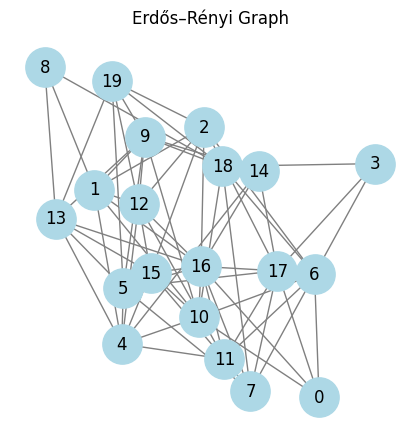

In [23]:
def visualize_graph(A):
    """Visualize graph given adjacency matrix A."""
    G = nx.from_numpy_array(A)

    plt.figure(figsize=(4, 4))
    nx.draw(
        G,
        with_labels=True,
        node_color='lightblue',
        node_size=800,
        font_size=12,
        edge_color='gray'
    )
    plt.title("Erdős–Rényi Graph")
    plt.show()

visualize_graph(A)

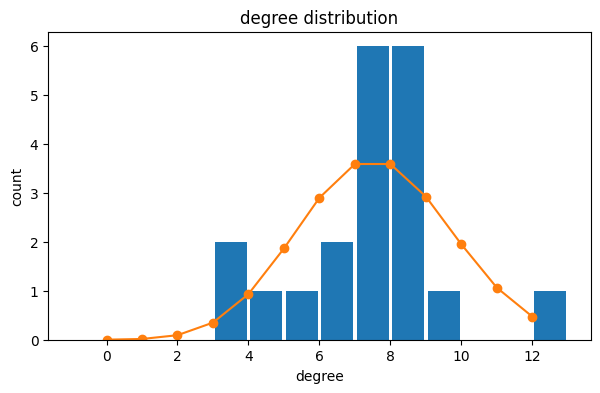

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import math

G = nx.from_numpy_array(A)
degrees = np.array([d for _, d in G.degree()])

plt.figure(figsize=(7,4))
bins = range(-1, degrees.max()+2)  # realistyczne wierzcholki otrzymane z grafu
plt.hist(degrees, bins=bins, rwidth=0.9)

k = np.arange(0, degrees.max()+1)
pmf = [math.comb(N-1, i)*p**i*(1-p)**(N-1-i) for i in k] # rozkład binomial z teorii do expected value
expected = np.array(pmf) * N
plt.plot(k, expected, marker='o')

plt.xlabel("degree")
plt.ylabel("count")
plt.title("degree distribution")
plt.show()

For the Erdős–Rényi model 
𝐺
(
𝑁
,
𝑝
)
G(N,p):

The degree distribution of a single vertex is

deg
⁡
(
𝑣
)
∼
B
i
n
o
m
i
a
l
(
𝑁
−
1
,
𝑝
)
.
deg(v)∼Binomial(N−1,p).

(Each of the remaining 
𝑁
−
1
N−1 vertices connects to 
𝑣
v independently with probability 
𝑝
p.)

The expected degree is

𝐸
[
deg
⁡
(
𝑣
)
]
=
(
𝑁
−
1
)
𝑝
.
E[deg(v)]=(N−1)p.

The variance is

V
a
r
[
deg
⁡
(
𝑣
)
]
=
(
𝑁
−
1
)
𝑝
(
1
−
𝑝
)
.
Var[deg(v)]=(N−1)p(1−p).

In [25]:
# we used AI to generate mathematical formulas above and to check the distribution of single vertex

Rozważmy stopień wierzchołka \(v\) w losowym grafie:

$$
\deg(v) \sim \text{Binomial}(n = N-1, p)
$$

Ustalmy 
$$
\lambda = n p
$$
i niech \(n \to \infty, p \to 0\), przy czym \(\lambda\) jest stałe.

Prawdopodobieństwo uzyskania stopnia \(k\) wynosi:

$$
\Pr(\deg(v) = k) = \binom{n}{k} p^k (1-p)^{n-k} 
= \frac{n (n-1) \cdots (n-k+1)}{k!} p^k (1-p)^{n-k}.
$$

Podstawiając 
$$
p = \frac{\lambda}{n},
$$
otrzymujemy granice:

$$
\frac{n (n-1) \cdots (n-k+1)}{n^k} \to 1, \quad
(1-p)^{n-k} = \left(1-\frac{\lambda}{n}\right)^{n} \left(1-\frac{\lambda}{n}\right)^{-k} \to e^{-\lambda}.
$$

W efekcie graniczna funkcja prawdopodobieństwa to rozkład Poissona:

$$
\Pr(\deg(v) = k) \to \frac{\lambda^k e^{-\lambda}}{k!}.
$$


# Experiment for L = 500 graphs

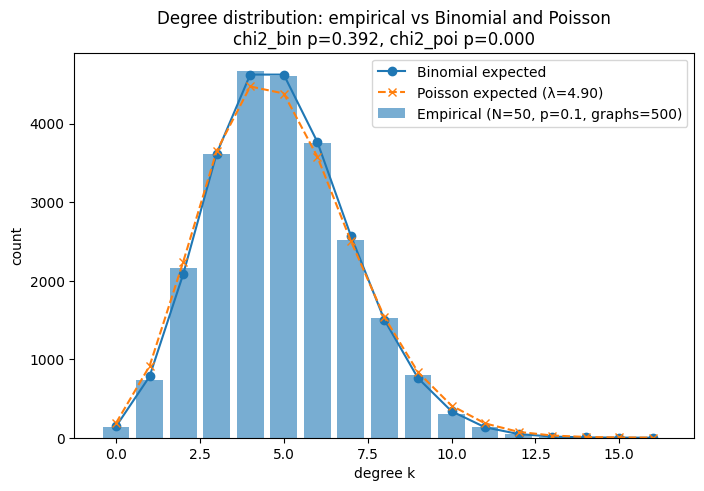

Summary (N, p, lambda, pval_binomial, pval_poisson):
50 0.1 4.900 0.5920 0.0000
50 0.01 0.490 0.9466 0.9697
200 0.01 1.990 0.3272 0.1323
200 0.02 3.980 0.9802 0.0487
1000 0.001 0.999 0.2709 0.2914
20 0.2 3.800 0.4468 0.0000


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
from scipy.stats import chisquare
import itertools

def er_degrees_single_graph(N, p, rng=None):
    if rng is None:
        rng = np.random
    upper = np.triu(rng.random((N, N)) < p, k=1).astype(int)
    A = upper + upper.T
    return A.sum(axis=0)

def simulate_degrees(N, p, num_graphs=1000, rng_seed=None):
    rng = np.random.RandomState(rng_seed)
    degs = []
    for _ in range(num_graphs):
        degs.extend(er_degrees_single_graph(N, p, rng))
    return np.array(degs)

def binomial_pmf(k_vals, N, p):
    n = N-1
    pmf = [math.comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in k_vals]
    return np.array(pmf)

from scipy.stats import poisson
def poisson_pmf(k_vals, lam):
    return poisson.pmf(k_vals, lam)

def merge_bins_for_chi2(obs_counts, exp_counts, min_expected=5):
    obs = obs_counts.copy()
    exp = exp_counts.copy()
    # merge high k tails until all expected >= min_expected
    while True:
        small = np.where(exp < min_expected)[0]
        if len(small) == 0:
            break
        i = small[-1]  # take largest index with small expectation
        if i == 0:
            break
        # merge bin i into i-1
        exp[i-1] += exp[i]
        obs[i-1] += obs[i]
        exp = np.delete(exp, i)
        obs = np.delete(obs, i)
    return obs, exp

def compare_empirical_to_models(N, p, num_graphs=1000, rng_seed=0, plot=True):
    degs = simulate_degrees(N, p, num_graphs=num_graphs, rng_seed=rng_seed)
    total_counts = len(degs)
    kmax = degs.max()
    k_vals = np.arange(0, max(kmax, N-1)+1)
    obs_counter = Counter(degs)
    obs_counts = np.array([obs_counter.get(k, 0) for k in k_vals], dtype=float)

    # theoretical pmfs
    bin_pmf = binomial_pmf(k_vals, N, p)
    lam = (N-1)*p
    poi_pmf = poisson_pmf(k_vals, lam)

    bin_expected = bin_pmf * total_counts
    poi_expected = poi_pmf * total_counts

    # chi-square for Binomial
    obs_b, exp_b = merge_bins_for_chi2(obs_counts.copy(), bin_expected.copy(), min_expected=5)
    chi2_bin, pval_bin = chisquare(obs_b, f_exp=exp_b)

    # chi-square for Poisson
    obs_p, exp_p = merge_bins_for_chi2(obs_counts.copy(), poi_expected.copy(), min_expected=5)
    chi2_poi, pval_poi = chisquare(obs_p, f_exp=exp_p)

    if plot:
        plt.figure(figsize=(8,5))
        max_k_plot = max( max(np.where(obs_counts>0)[0]), int(np.ceil(lam+5*math.sqrt(lam if lam>0 else 1))) )
        ks_plot = np.arange(0, max_k_plot+1)
        obs_plot = np.array([obs_counter.get(k,0) for k in ks_plot])
        plt.bar(ks_plot, obs_plot, alpha=0.6, label=f'Empirical (N={N}, p={p}, graphs={num_graphs})')

        bin_plot = binomial_pmf(ks_plot, N, p) * total_counts
        poi_plot = poisson_pmf(ks_plot, lam) * total_counts
        plt.plot(ks_plot, bin_plot, marker='o', linestyle='-', label='Binomial expected')
        plt.plot(ks_plot, poi_plot, marker='x', linestyle='--', label=f'Poisson expected (λ={lam:.2f})')

        plt.xlabel('degree k')
        plt.ylabel('count')
        plt.legend()
        plt.title(f'Degree distribution: empirical vs Binomial and Poisson\nchi2_bin p={pval_bin:.3f}, chi2_poi p={pval_poi:.3f}')
        plt.show()

    return {
        'N': N, 'p': p, 'lambda': lam, 'total_counts': total_counts,
        'chi2_bin': chi2_bin, 'pval_bin': pval_bin,
        'chi2_poi': chi2_poi, 'pval_poi': pval_poi,
        'obs_counts': obs_counts, 'bin_expected': bin_expected, 'poi_expected': poi_expected
    }

# Example single run
res = compare_empirical_to_models(N=50, p=0.1, num_graphs=500, rng_seed=1)

# Sweep over several (N,p) combinations
params = [(50,0.1),(50,0.01),(200,0.01),(200,0.02),(1000,0.001),(20,0.2)]
results = []
for N,p in params:
    r = compare_empirical_to_models(N=N, p=p, num_graphs=500, rng_seed=42, plot=False)
    results.append(r)

print("Summary (N, p, lambda, pval_binomial, pval_poisson):")
for r in results:
    print(r['N'], r['p'], f"{r['lambda']:.3f}", f"{r['pval_bin']:.4f}", f"{r['pval_poi']:.4f}")


# P.5.1

Consider \(K\) with Poisson distrubution with param $$\lambda = \langle k \rangle$$:

$$
P(K=k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0,1,2,\dots
$$

---

### 1. expected value \(E(K)\)

$$
E(K) = \sum_{k=0}^{\infty} k \, P(K=k) 
= \sum_{k=1}^{\infty} k \frac{\lambda^k e^{-\lambda}}{k!} 
= \sum_{k=1}^{\infty} \lambda \frac{\lambda^{k-1} e^{-\lambda}}{(k-1)!} 
= \lambda \sum_{m=0}^{\infty} \frac{\lambda^m e^{-\lambda}}{m!} 
= \lambda \cdot 1 = \lambda.
$$

---

### 2. Second momentum \(E(K^2)\)

$$
E(K^2) = \sum_{k=0}^{\infty} k^2 P(K=k) 
= \sum_{k=0}^{\infty} [k(k-1) + k] \frac{\lambda^k e^{-\lambda}}{k!} 
= \sum_{k=2}^{\infty} k(k-1) \frac{\lambda^k e^{-\lambda}}{k!} + \sum_{k=1}^{\infty} k \frac{\lambda^k e^{-\lambda}}{k!}.
$$

First component:

$$
\sum_{k=2}^{\infty} k(k-1) \frac{\lambda^k e^{-\lambda}}{k!} 
= \sum_{k=2}^{\infty} \lambda^2 \frac{\lambda^{k-2} e^{-\lambda}}{(k-2)!} 
= \lambda^2 \sum_{m=0}^{\infty} \frac{\lambda^m e^{-\lambda}}{m!} 
= \lambda^2.
$$

Second component is \(E(K) = \lambda\). So:

$$
E(K^2) = \lambda^2 + \lambda.
$$

---

### 3. Variaton

$$
\text{Var}(K) = E(K^2) - [E(K)]^2 = (\lambda^2 + \lambda) - \lambda^2 = \lambda.
$$

✅ Conclusion: For Poisson Expected value and Variance is equal

$$
\boxed{E(K) = \lambda, \quad \text{Var}(K) = \lambda}.
$$


# P5.2

For \(v\) vertex in Erdős–Rényi graph, C is:

$$
\langle C_v \rangle 
= \frac{\langle \text{edges between neighbors} \rangle}{\binom{k_v}{2}} 
= p
$$

In [36]:
import numpy as np

def er_graph(N, p, rng=None):
    upper = np.triu(rng.random((N, N)) < p, k=1).astype(int)
    A = upper + upper.T
    return A

def clustering_coefficient(A):
    N = A.shape[0]
    C_total = 0
    for v in range(N):
        neighbors = np.where(A[v] == 1)[0]
        k = len(neighbors)
        if k < 2:
            continue
        # liczba krawędzi między sąsiadami
        subgraph = A[np.ix_(neighbors, neighbors)]
        actual_edges = np.sum(subgraph) / 2  # bo macierz symetryczna
        C_total += actual_edges / (k * (k-1) / 2)
    return C_total / N

# parametry
N = 100
p = 0.1
rng = np.random.RandomState(42)

# wygeneruj graf i policz C
A = er_graph(N, p, rng=rng)
C_sim = clustering_coefficient(A)

print(f"Average cluster coefficiant (simulation): {C_sim:.3f}")
print(f"Theoritical variablue: {p}")


Average cluster coefficiant (simulation): 0.115
Theoritical variablue: 0.1


# P5.3

### 1. p_in >> p_put

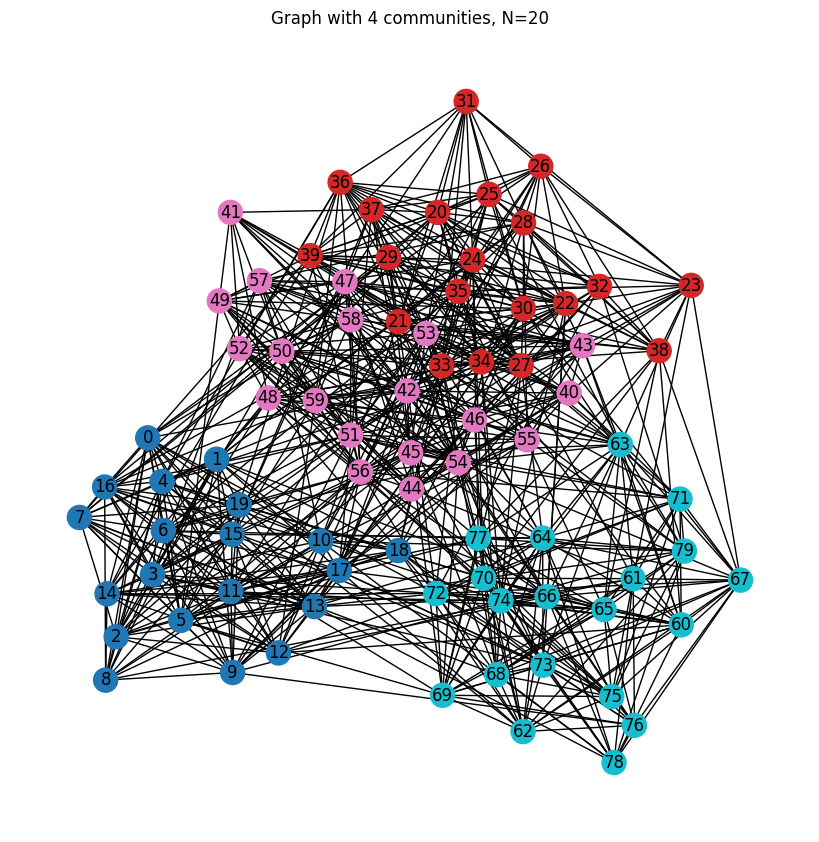

In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parametry
num_communities = 4
N = 20  # liczba węzłów w każdej społeczności
p_in = 0.4   # prawdopodobieństwo połączenia wewnątrz społeczności
p_out = 0.05  # prawdopodobieństwo połączenia między społecznościami
total_nodes = num_communities * N

# Generowanie macierzy prawdopodobieństwa
P = np.full((total_nodes, total_nodes), p_out)

for i in range(num_communities):
    start = i*N
    end = (i+1)*N
    P[start:end, start:end] = p_in

# Symetryczna macierz i brak samopołączeń
np.fill_diagonal(P, 0)
P = np.triu(P) + np.triu(P, 1).T

# Generowanie macierzy sąsiedztwa
rng = np.random.RandomState(42)
A = (rng.rand(total_nodes, total_nodes) < P).astype(int)

# Tworzenie grafu networkx
G = nx.from_numpy_array(A)

# Kolory węzłów według społeczności
colors = []
for i in range(num_communities):
    colors.extend([i] * N)

# Rysowanie grafu
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, seed=42)  # layout siłowy
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.tab10, node_size=300)
plt.title(f"Graph with {num_communities} communities, N={N}")
plt.show()


### 2. p_in ≈ p_out

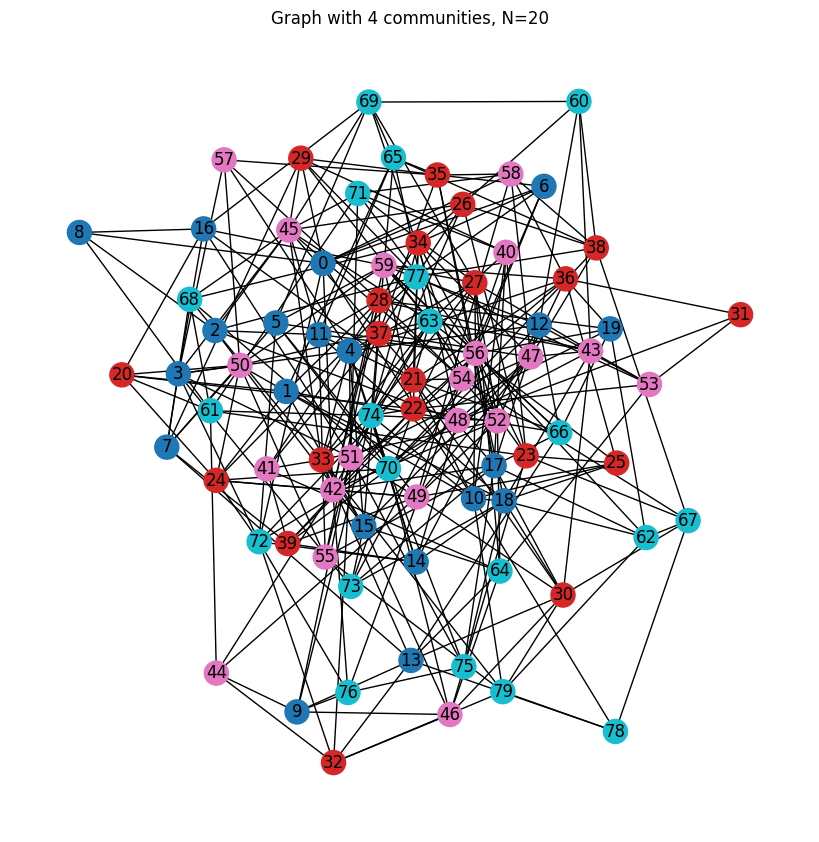

In [39]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parametry
num_communities = 4
N = 20  # liczba węzłów w każdej społeczności
p_in = 0.06   # prawdopodobieństwo połączenia wewnątrz społeczności
p_out = 0.05  # prawdopodobieństwo połączenia między społecznościami
total_nodes = num_communities * N

# Generowanie macierzy prawdopodobieństwa
P = np.full((total_nodes, total_nodes), p_out)

for i in range(num_communities):
    start = i*N
    end = (i+1)*N
    P[start:end, start:end] = p_in

# Symetryczna macierz i brak samopołączeń
np.fill_diagonal(P, 0)
P = np.triu(P) + np.triu(P, 1).T

# Generowanie macierzy sąsiedztwa
rng = np.random.RandomState(42)
A = (rng.rand(total_nodes, total_nodes) < P).astype(int)

# Tworzenie grafu networkx
G = nx.from_numpy_array(A)

# Kolory węzłów według społeczności
colors = []
for i in range(num_communities):
    colors.extend([i] * N)

# Rysowanie grafu
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, seed=42)  # layout siłowy
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.tab10, node_size=300)
plt.title(f"Graph with {num_communities} communities, N={N}")
plt.show()


2. How does it depend on the parameters?

p_in >> p_out → 4 clearly visible communities, nodes strongly connected within, weakly between groups.

p_in ≈ p_out → communities become invisible, the graph looks more random.

Increasing p_out → “bridges” between communities, more coherent graph, less modularity.

Increasing N → larger communities, visually more compact clusters.

# P5.4

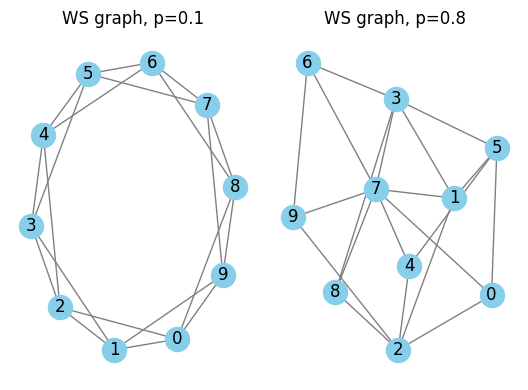

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

# Parametry grafu WS
N = 10    # liczba węzłów (mniejsze dla czytelności)
k = 4     # każdy węzeł połączony z k najbliższymi sąsiadami w pierścieniu
p_values = [0.1, 0.8]

plt.figure(figsize=(8,4))

for i, p in enumerate(p_values):
    G = nx.watts_strogatz_graph(N, k, p)
    pos = nx.spring_layout(G)  # layout siłowy
    
    plt.subplot(1, 3, i+1)
    nx.draw(G, pos, node_color='skyblue', with_labels=True, node_size=300, edge_color='gray')
    plt.title(f"WS graph, p={p}")

plt.tight_layout()
plt.show()


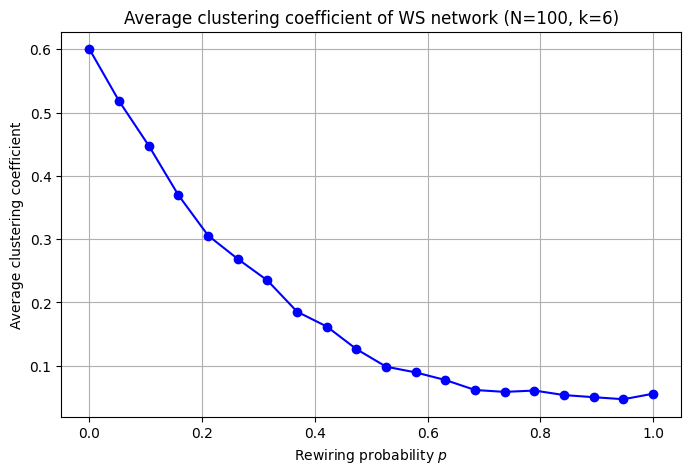

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parametry grafu WS
N = 100          # liczba węzłów
k = 6            # każdy węzeł połączony z k najbliższymi sąsiadami w pierścieniu
p_values = np.linspace(0, 1, 20)  # wartości parametru p
num_runs = 5     # średnia z kilku powtórzeń dla stabilności

clustering_avg = []

for p in p_values:
    c_runs = []
    for _ in range(num_runs):
        G = nx.watts_strogatz_graph(N, k, p)
        c = nx.average_clustering(G)
        c_runs.append(c)
    clustering_avg.append(np.mean(c_runs))

# Rysowanie wykresu
plt.figure(figsize=(8,5))
plt.plot(p_values, clustering_avg, 'o-', color='blue')
plt.xlabel("Rewiring probability $p$")
plt.ylabel("Average clustering coefficient")
plt.title(f"Average clustering coefficient of WS network (N={N}, k={k})")
plt.grid(True)
plt.show()


# P5.5

Number of nodes: 50
Number of edges: 100
Average degree: 4.00
Average clustering coefficient: 0.098
Number of connected components: 1


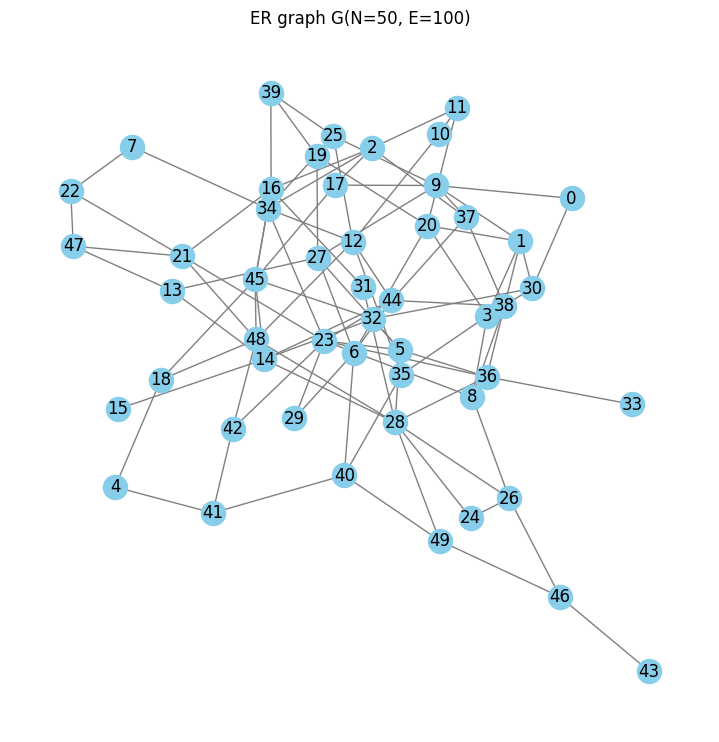

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parametry grafu
N = 50     # liczba węzłów
E = 100    # liczba krawędzi

# Generowanie grafu ER(GN,E)
G = nx.gnm_random_graph(N, E)

# Podstawowe statystyki
degrees = [deg for node, deg in G.degree()]
avg_degree = np.mean(degrees)
clustering = nx.average_clustering(G)
num_components = nx.number_connected_components(G)

print(f"Number of nodes: {N}")
print(f"Number of edges: {E}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Average clustering coefficient: {clustering:.3f}")
print(f"Number of connected components: {num_components}")

# Wizualizacja grafu
plt.figure(figsize=(7,7))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='skyblue', edge_color='gray', node_size=300, with_labels=True)
plt.title(f"ER graph G(N={N}, E={E})")
plt.show()


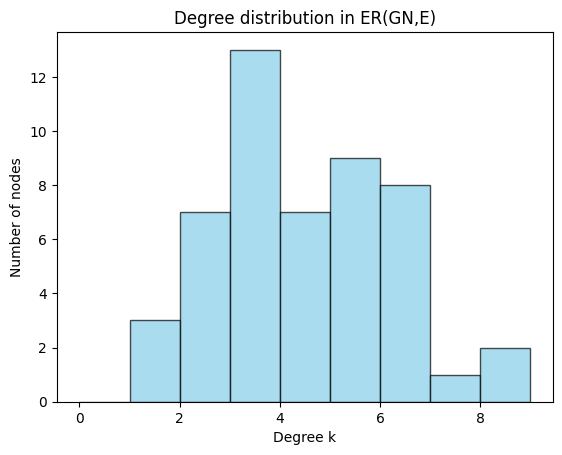

In [63]:
import matplotlib.pyplot as plt

plt.hist(degrees, bins=range(max(degrees)+2), alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel("Degree k")
plt.ylabel("Number of nodes")
plt.title("Degree distribution in ER(GN,E)")
plt.show()


For ER(GN,E) we can approaximate:
$$
p=
2E / N(N−1)
$$
	​

And use Bernoulli distribution:
$$
B(N−1,p)
$$

# P5.6

Suma stopni: 16
Degree sequence: [2, 3, 1, 2, 2, 1, 1, 2]
Number of edges: 7
Number of nodes: 8


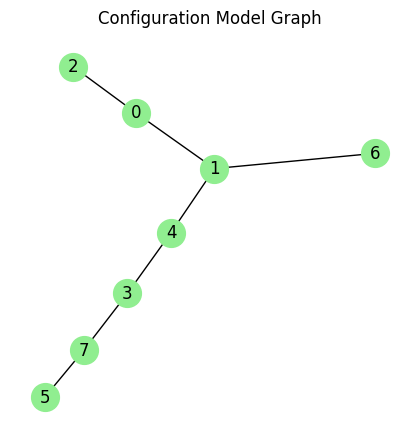

In [70]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Przykładowy rozkład stopni
degree_sequence = [3, 3, 2, 2, 2, 1, 1, 2]
print("Suma stopni:", sum(degree_sequence))


# Sprawdzamy warunek zbieżności: suma stopni musi być parzysta
if sum(degree_sequence) % 2 != 0:
    raise ValueError("Sum of degrees must be even for the configuration model!")

# Tworzenie grafu
G = nx.configuration_model(degree_sequence)

# Konwersja do grafu prostego (usuwamy self-loops i wielokrotne krawędzie)
G = nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))

# Podstawowe statystyki
print("Degree sequence:", [d for n, d in G.degree()])
print("Number of edges:", G.number_of_edges())
print("Number of nodes:", G.number_of_nodes())

# Rysowanie grafu
plt.figure(figsize=(4,4))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='lightgreen', with_labels=True, node_size=400)
plt.title("Configuration Model Graph")
plt.show()


In [71]:
# Funkcja sprawdzająca, czy konfiguracja się uda
def test_configuration_model(degree_sequence):
    try:
        if sum(degree_sequence) % 2 != 0:
            print("Sum of degrees not even. Cannot generate graph.")
            return False
        G = nx.configuration_model(degree_sequence, seed=42)
        G_simple = nx.Graph(G)
        G_simple.remove_edges_from(nx.selfloop_edges(G_simple))
        print("Graph generated successfully!")
        return True
    except Exception as e:
        print("Error:", e)
        return False

# Przykłady
seq1 = [3,3,2,2,2,1,1,1]      # powinna działać
seq2 = [4,4,4,1,1]            # suma stopni nieparzysta -> błąd
seq3 = [7,1,1,1,1]            # niemożliwa do wygenerowania prostego grafu

for seq in [seq1, seq2, seq3]:
    print("Testing sequence:", seq)
    test_configuration_model(seq)


Testing sequence: [3, 3, 2, 2, 2, 1, 1, 1]
Sum of degrees not even. Cannot generate graph.
Testing sequence: [4, 4, 4, 1, 1]
Graph generated successfully!
Testing sequence: [7, 1, 1, 1, 1]
Sum of degrees not even. Cannot generate graph.


## Convergence test:

In [74]:
import networkx as nx

def test_configuration_model(degree_sequence):
    """
    Sprawdza, czy Configuration Model może wygenerować graf prosty.
    Zwraca True, jeśli udało się wygenerować graf prosty.
    """
    # Warunek 1: suma stopni parzysta
    if sum(degree_sequence) % 2 != 0:
        print("Sum of degrees is not even. Cannot converge.")
        return False
    
    # Warunek 2: każdy stopień <= N-1
    N = len(degree_sequence)
    if any(k > N-1 for k in degree_sequence):
        print("Degree sequence invalid: some degree > N-1. Cannot converge.")
        return False
    
    # Spróbuj wygenerować graf
    try:
        G = nx.configuration_model(degree_sequence, seed=42)
        G_simple = nx.Graph(G)
        G_simple.remove_edges_from(nx.selfloop_edges(G_simple))
        print("Graph generated successfully")
        print(f"Nodes: {G_simple.number_of_nodes()}, Edges: {G_simple.number_of_edges()}")
        return True
    except Exception as e:
        print("Error during graph generation:", e)
        return False

sequences = [
    [3, 3, 2, 2, 2, 1, 1, 2],  # poprawna sekwencja, suma parzysta
    [3, 3, 2, 2, 2, 1, 1, 1],  # suma nieparzysta -> nie zbiega
    [7, 1, 1, 1, 1],           # zbyt duży stopień -> nie zbiega
]

for seq in sequences:
    print("\nTesting sequence:", seq)
    test_configuration_model(seq)




Testing sequence: [3, 3, 2, 2, 2, 1, 1, 2]
Graph generated successfully
Nodes: 8, Edges: 7

Testing sequence: [3, 3, 2, 2, 2, 1, 1, 1]
Sum of degrees is not even. Cannot converge.

Testing sequence: [7, 1, 1, 1, 1]
Sum of degrees is not even. Cannot converge.


## P5.7

In [78]:
# We used AI to help us with the Monte Carlo method (AI found that the number of combination is too big 
# that Monte Carlo method could be possible implemented for computing)

In [75]:
import networkx as nx
import numpy as np
import itertools

# Parametry grafu
N = 5
E = 4
theta = 1.0  # parametr Hamiltonianu

# Wszystkie możliwe krawędzie
edges_possible = list(itertools.combinations(range(N), 2))

# Wszystkie możliwe grafy z E krawędziami
all_graphs_edges = list(itertools.combinations(edges_possible, E))

# Funkcja Hamiltonianu (przykład: liczba trójek)
def hamiltonian(edges, N):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    G.add_edges_from(edges)
    triangles = sum(nx.triangles(G).values()) / 3  # każda trójka liczona 3 razy
    return theta * triangles

# Oblicz funkcję podziału
Z = 0
probabilities = []
for edges in all_graphs_edges:
    H = hamiltonian(edges, N)
    weight = np.exp(-H)
    Z += weight
    probabilities.append(weight)

# Normalizacja
probabilities = np.array(probabilities) / Z

print(f"Partition function Z = {Z}")
print("Probabilities of each graph:")
for i, p in enumerate(probabilities):
    print(f"Graph {i+1}: {p:.4f}")


Partition function Z = 165.7515608820011
Probabilities of each graph:
Graph 1: 0.0060
Graph 2: 0.0022
Graph 3: 0.0022
Graph 4: 0.0060
Graph 5: 0.0022
Graph 6: 0.0060
Graph 7: 0.0060
Graph 8: 0.0022
Graph 9: 0.0060
Graph 10: 0.0022
Graph 11: 0.0060
Graph 12: 0.0022
Graph 13: 0.0060
Graph 14: 0.0022
Graph 15: 0.0022
Graph 16: 0.0022
Graph 17: 0.0022
Graph 18: 0.0022
Graph 19: 0.0060
Graph 20: 0.0060
Graph 21: 0.0060
Graph 22: 0.0060
Graph 23: 0.0060
Graph 24: 0.0060
Graph 25: 0.0060
Graph 26: 0.0060
Graph 27: 0.0060
Graph 28: 0.0060
Graph 29: 0.0060
Graph 30: 0.0022
Graph 31: 0.0022
Graph 32: 0.0060
Graph 33: 0.0060
Graph 34: 0.0022
Graph 35: 0.0022
Graph 36: 0.0060
Graph 37: 0.0060
Graph 38: 0.0060
Graph 39: 0.0060
Graph 40: 0.0022
Graph 41: 0.0022
Graph 42: 0.0022
Graph 43: 0.0022
Graph 44: 0.0060
Graph 45: 0.0060
Graph 46: 0.0060
Graph 47: 0.0060
Graph 48: 0.0060
Graph 49: 0.0060
Graph 50: 0.0060
Graph 51: 0.0022
Graph 52: 0.0060
Graph 53: 0.0060
Graph 54: 0.0060
Graph 55: 0.0022
Grap